In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhumigupta123","key":"849cf6dbf0b287d4bbd6d077e167b0a6"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [5]:
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'binary', # Changed to 'binary'
    batch_size = 32,
    image_size = (256, 256)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'binary', # Changed to 'binary'
    batch_size = 32,
    image_size = (256, 256)
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
from tensorflow.keras.utils import to_categorical

def process(image, label):
  image = tf.cast(image/255. ,	tf.float32)
  label = to_categorical(label, num_classes=2) # One-hot encode the labels
  return image, label
train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2, padding = 'valid'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2, padding = 'valid'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2, padding = 'valid'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,258 (56.64 MB)

 Trainable params: 14,847,810 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 82ms/step - accuracy: 0.5328 - loss: 0.7494 - val_accuracy: 0.5012 - val_loss: 0.6917
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 83ms/step - accuracy: 0.5019 - loss: 0.6988 - val_accuracy: 0.5002 - val_loss: 0.6929
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.5024 - loss: 0.6958 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.4966 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.7022
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.4972 - loss: 0.6948 - val_accuracy: 0.5000 - val_loss: 0.6931


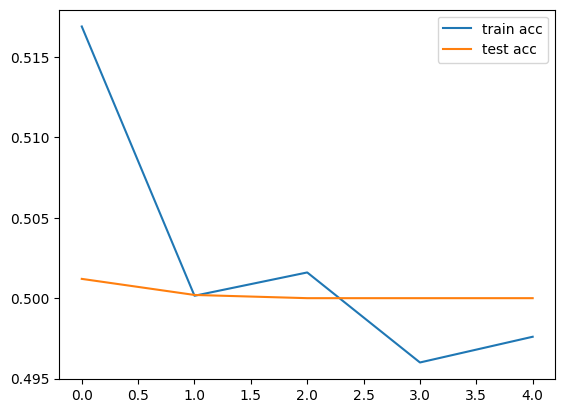

In [12]:
# Plotting Graph - accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()

In [13]:
# Plot Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
# Extract true Labels from the test dataset
y_true = []
for images, labels in test_ds:
  y_true.extend(np.argmax(labels.numpy(), axis=1)) # Convert to class indices

Y_pred = model.predict(test_ds)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
# Use y_true instead of test_ds.classes
print(confusion_matrix(y_true, y_pred))

print('Classification Report')
target_names = ['Cats', 'Dogs']
print(classification_report(y_true, y_pred, target_names=target_names))

157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step
Confusion Matrix
[[   0 2500]
 [   0 2500]]
Classification Report
              precision    recall  f1-score   support

        Cats       0.00      0.00      0.00      2500
        Dogs       0.50      1.00      0.67      2500

    accuracy                           0.50      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.25      0.50      0.33      5000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
import cv2
def predict_image(image_path):
  img = cv2.imread(image_path)
  img = cv2.resize(img, (256, 256))
  img = img / 255.0
  img = np.expand_dims(img, axis=0)
  prediction = model.predict(img)
  predicted_class = np.argmax(prediction)
  if predicted_class == 0:
    print("The image is predicted as a cat.")
  else:
    print("The image is predicted as a dog.")
# Replace 'path/to/your/image.jpg' with the actual path to your image
predict_image('/content/dogs_vs_cats/test/cats/cat.10.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The image is predicted as a dog.


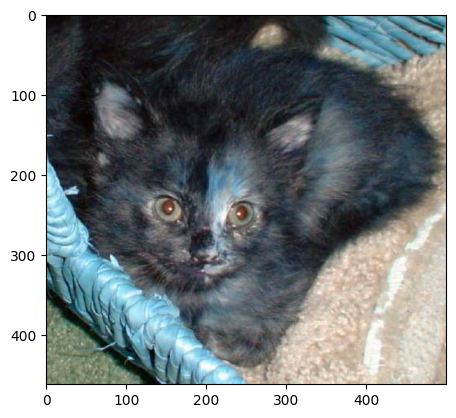

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


array([[0.4995604 , 0.50046825]], dtype=float32)

In [15]:
test_img = cv2.imread('/content/dogs_vs_cats/test/cats/cat.10030.jpg')
plt.imshow(test_img)
plt.show()
test_img.shape
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))
model.predict(test_input)

In [16]:
def preprocess_image (image_path):
  image = cv2.imread(image_path) # Load image
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
  image = cv2.resize(image, (256, 256)) # Resize to match model input
  image = image / 255.0 # Normalize pixel values
  image = np.expand_dims (image, axis=0) # Add batch dimension
  return image
def predict_image(image_path):
  image = preprocess_image(image_path)
  prediction = model.predict(image)[0][0] # Get prediction score
  label = "Cat" if prediction > 0.5 else "Dog"
  confidence = max(prediction, 1 - prediction) * 100 # Convert to percentage
  print(f"Prediction: {label} (Confidence: {confidence:.2f}%)")
image_path = "/content/dogs_vs_cats/test/cats/cat.10030.jpg" # Replace with your i
predict_image (image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Prediction: Dog (Confidence: 50.04%)
